In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/asus/Documents/Belajar/titanic/train_and_test2.csv')

In [2]:
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
import pandas_profiling as pp

pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.drop(['Passengerid','zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],axis=1,inplace=True)
df.rename(columns = {'2urvived' : 'Survived'}, inplace = True)

In [5]:
df.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [6]:
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()

cf.set_config_file(theme='polar')
contract_val = df['Survived'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                   'values': contract_val.values
                  })
contract_df.iplot(kind='pie',labels='labels',values='values', title='Distribution of Survived People')

In [7]:
from plotly.offline import iplot

df.iplot(x = 'Sex', y='Survived', kind = 'bar', xTitle='Sex', yTitle='Survived', title='Sex by Survived')

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    0
Survived    0
dtype: int64

<AxesSubplot:>

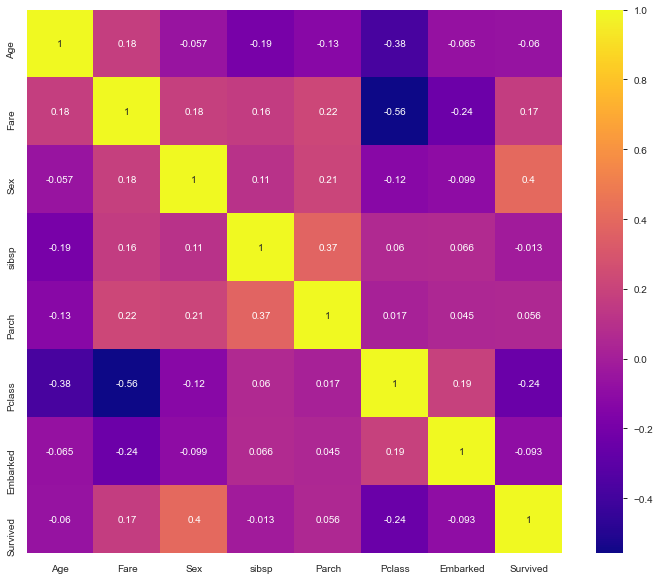

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
# we keep annot=True to make the values appear of df.corr() appear on the heatmap
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.plasma)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(['Survived'], axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [12]:
X.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.2500,0,1,0,3,2.0
1,38.0,71.2833,1,1,0,1,0.0
2,26.0,7.9250,1,0,0,3,2.0
3,35.0,53.1000,1,1,0,1,2.0
4,35.0,8.0500,0,0,0,3,2.0


In [13]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_test)
print('Accuracy = ', accuracy_score(y_predict, y_test))

Accuracy =  0.767175572519084


Text(48.5, 0.5, 'Actual')

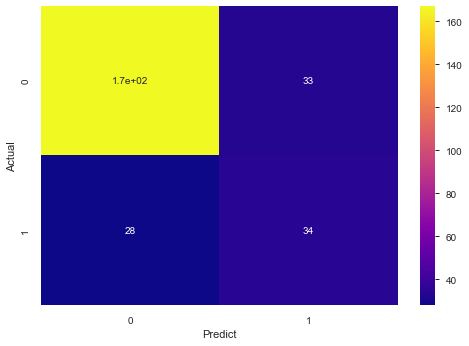

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, cmap = plt.cm.plasma)
plt.xlabel('Predict')
plt.ylabel('Actual')